In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pickle
from src.utils import get_best_t
from src.utils import get_theory_curves
from src.data_load import load_minimum, collect_minima

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 14,
    'style'  : 'normal'}
matplotlib.rc('font', **font)

In [2]:
# -------------------------------------------------------------------
# States / conditions per dataset
# -------------------------------------------------------------------

states_zhang = ["mid_G1", "late_G1"]
states_abramo = ["4h", "5h", "6h", "7h"]

states_bonev = [
    "HiC_CN_1.mm10.mapq_30.1000.mcool",
    "HiC_CN_2.mm10.mapq_30.1000.mcool",
    "HiC_CN_3.mm10.mapq_30.1000.mcool",
    "HiC_CN_4.mm10.mapq_30.1000.mcool",
    "HiC_CN_5.mm10.mapq_30.1000.mcool",
    "HiC_CN_6.mm10.mapq_30.1000.mcool",
    "HiC_ES_1.mm10.mapq_30.1000.mcool",
    "HiC_ES_2.mm10.mapq_30.1000.mcool",
    "HiC_ES_3.mm10.mapq_30.1000.mcool",
    "HiC_ES_4.mm10.mapq_30.1000.mcool",
    "HiC_ncx_CN_1.mm10.mapq_30.1000.mcool",
    "HiC_ncx_CN_2.mm10.mapq_30.1000.mcool",
    "HiC_ncx_CN_3.mm10.mapq_30.1000.mcool",
    "HiC_ncx_CN_4.mm10.mapq_30.1000.mcool",
]

states_rao = [
    "GM12878_inSitu_DpnII.hg38.mapq_30.1000.mcool",
    "HMEC_inSitu_MboI.hg38.mapq_30.1000.mcool",
    "HUVEC_inSitu_MboI.hg38.mapq_30.1000.mcool",
    "IMR90_inSitu_MboI.hg38.mapq_30.1000.mcool",
    "K562_inSitu_MboI.hg38.mapq_30.1000.mcool",
    "KBM7_inSitu_MboI.hg38.mapq_30.1000.mcool",
    "NHEK_inSitu_MboI.hg38.mapq_30.1000.mcool",
]

states_hff = [
    "U54-HFFc6-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool",
    "hg38_deep",
]

states_esc = [
    "U54-ESC4DN-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool",
    "U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool",
]

states_wutz = ["control.hg38.mapq_30.1000.mcool"]
states_schwarzer = ["TAM.mm10.mapq_30.1000.mcool"]



In [3]:
data_dir = "../data"
#data_dir = "logders_fig2_33data"


# Abramo (HeLa, mitotic exit time course)
xs_abramo, ys_abramo = collect_minima("abramo", states_abramo, data_dir)

# Zhang (mESC, mitotic exit time course)
xs_zhang, ys_zhang = collect_minima("zhang", states_zhang, data_dir)

# Bonev (CN/ES)
xs_bonev, ys_bonev = collect_minima("bonev", states_bonev, data_dir)

# Rao (GM12878 etc.)
xs_rao, ys_rao = collect_minima("rao", states_rao, data_dir)

# Oksuz HFF (HFF)
xs_hff, ys_hff = collect_minima("oksuz_hff", states_hff, data_dir)

# Oksuz ESC (hESC protocols)
xs_esc, ys_esc = collect_minima("oksuz_esc", states_esc, data_dir)

# Wutz (control)
xs_wutz, ys_wutz = collect_minima("wutz", states_wutz, data_dir)

# Schwarzer (TAM control)
xs_sch, ys_sch = collect_minima("schwarzer", states_schwarzer, data_dir)

In [4]:
dataset_styles = {
    "Rao":      dict(xs=xs_rao,    ys=ys_rao,    states=states_rao),
    "Bonev":    dict(xs=xs_bonev,  ys=ys_bonev,  states=states_bonev),
    "Oksuz HFF":dict(xs=xs_hff,    ys=ys_hff,    states=states_hff),
    "Oksuz ESC":dict(xs=xs_esc,    ys=ys_esc,    states=states_esc),
    "Wutz":     dict(xs=xs_wutz,   ys=ys_wutz,   states=states_wutz),
    "Schwarzer":dict(xs=xs_sch,    ys=ys_sch,    states=states_schwarzer),
    "Zhang":    dict(xs=xs_zhang,  ys=ys_zhang,  states=states_zhang),
    "Abramo":   dict(xs=xs_abramo, ys=ys_abramo, states=states_abramo),
}

In [5]:
T_values = np.arange(100, 301, 10)
v0_values = np.arange(0.1, 15, 0.1)
print(v0_values)

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2
 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6
 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.
 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9]


In [6]:
# Get theoretical positions and depths of log-derivative minima
# across a grid of loop periods T and effective fragment lengths v0

theory_xmins, theory_ymins, s_grid, v0_values = get_theory_curves(T_values, v0_values)

In [7]:
# Optimal parameters from the position of the DIP -- for each data

all_T = []
all_v0 = []
all_density = []

for name, style in dataset_styles.items():

    print(f"{name}")

    for x_bp, y_obs, state in zip(style["xs"], style["ys"], style["states"]):
        # convert s_min from bp to kb
        x_kb = x_bp / 1000.0

        T_best, v0_best, err = get_best_t(
            (x_kb, y_obs),
            theory_xmins=theory_xmins,
            theory_ymins=theory_ymins,
            T_values=T_values,
            v0_values=v0_values,
            x_weight=1e-4,
        )
        print(f"{state}")
        print(f"T = {T_best}")
        print(f"v0 = {v0_best}")
        print(f"density = {(1000.0 / T_best):.2f} loops/Mb")
        print(f"error = {err:.6f}")
        print()
        all_T.append(T_best)
        all_v0.append(v0_best)

Rao
GM12878_inSitu_DpnII.hg38.mapq_30.1000.mcool
T = 140
v0 = 3.2
density = 7.14 loops/Mb
error = 0.000039

HMEC_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 140
v0 = 3.5000000000000004
density = 7.14 loops/Mb
error = 0.000013

HUVEC_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 120
v0 = 7.7
density = 8.33 loops/Mb
error = 0.000031

IMR90_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 140
v0 = 5.1
density = 7.14 loops/Mb
error = 0.000004

K562_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 120
v0 = 5.0
density = 8.33 loops/Mb
error = 0.000035

KBM7_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 170
v0 = 11.9
density = 5.88 loops/Mb
error = 0.000009

NHEK_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 210
v0 = 7.3
density = 4.76 loops/Mb
error = 0.000018

Bonev
HiC_CN_1.mm10.mapq_30.1000.mcool
T = 200
v0 = 8.5
density = 5.00 loops/Mb
error = 0.000024

HiC_CN_2.mm10.mapq_30.1000.mcool
T = 200
v0 = 9.0
density = 5.00 loops/Mb
error = 0.000005

HiC_CN_3.mm10.mapq_30.1000.mcool
T = 200
v0 = 8.5
density = 5.00 loops/Mb
error = 0.

In [8]:
from utils import get_full_theory_curves, get_best_params
from data_load import load_data

In [9]:
s_grid, y_array, T_values, v0_values = get_full_theory_curves(T_values, v0_values, s_min=1, s_max=50)

rao
GM12878_inSitu_DpnII.hg38.mapq_30.1000.mcool
T = 150.0
v0 = 3.2
density = 6.67 loops/Mb



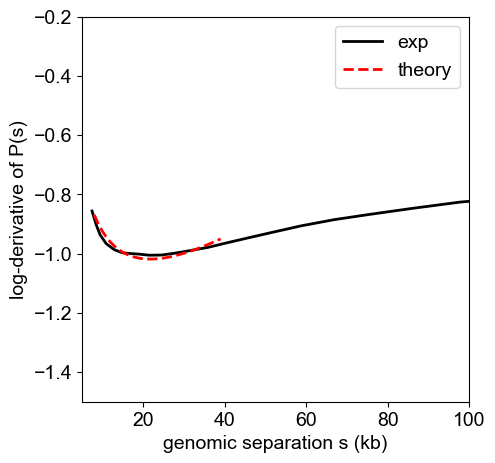

HMEC_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 140.0
v0 = 3.6
density = 7.14 loops/Mb



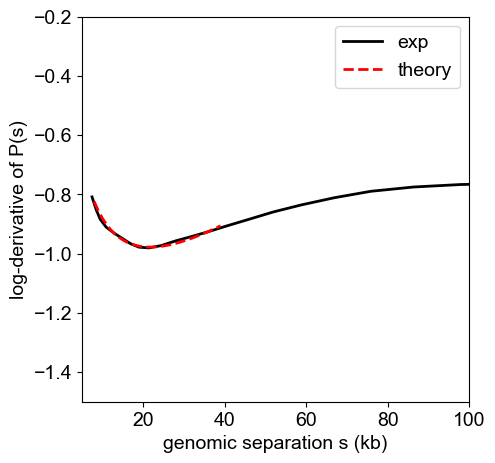

HUVEC_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 120.0
v0 = 7.3
density = 8.33 loops/Mb



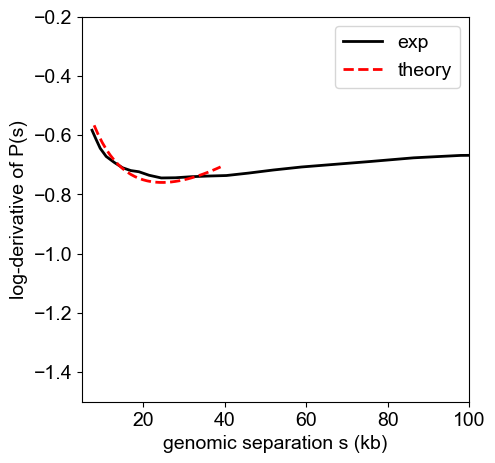

IMR90_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 130.0
v0 = 4.3999999999999995
density = 7.69 loops/Mb



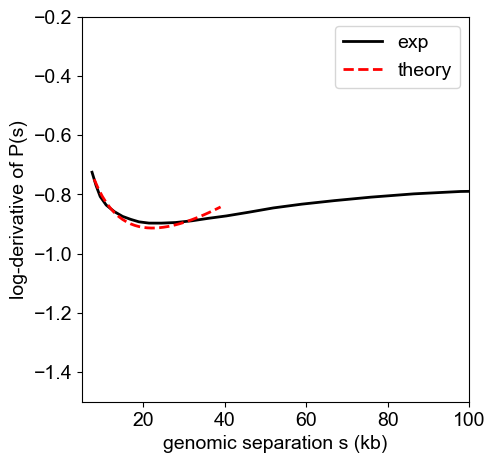

K562_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 140.0
v0 = 5.7
density = 7.14 loops/Mb



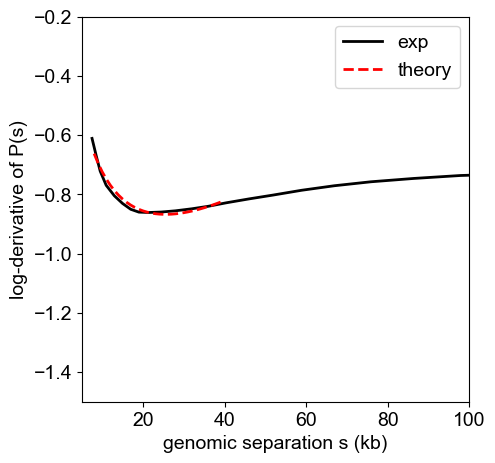

KBM7_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 160.0
v0 = 11.3
density = 6.25 loops/Mb



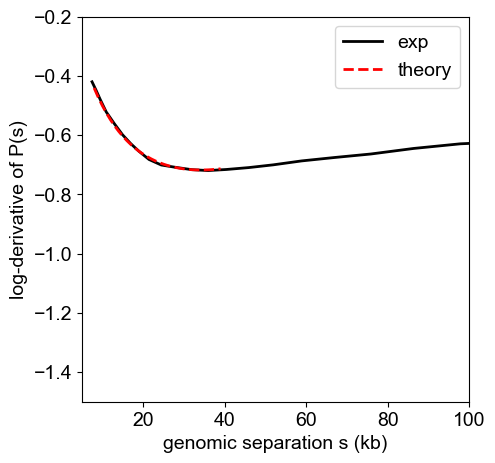

NHEK_inSitu_MboI.hg38.mapq_30.1000.mcool
T = 180.0
v0 = 6.3
density = 5.56 loops/Mb



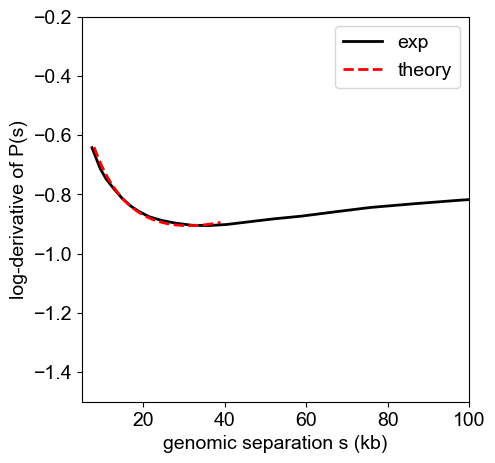

bonev
HiC_CN_1.mm10.mapq_30.1000.mcool
T = 190.0
v0 = 8.2
density = 5.26 loops/Mb



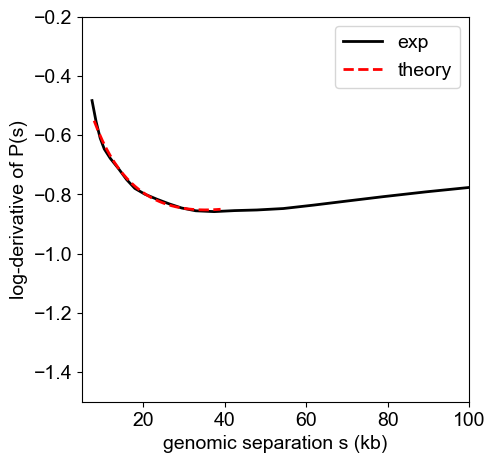

HiC_CN_2.mm10.mapq_30.1000.mcool
T = 160.0
v0 = 7.2
density = 6.25 loops/Mb



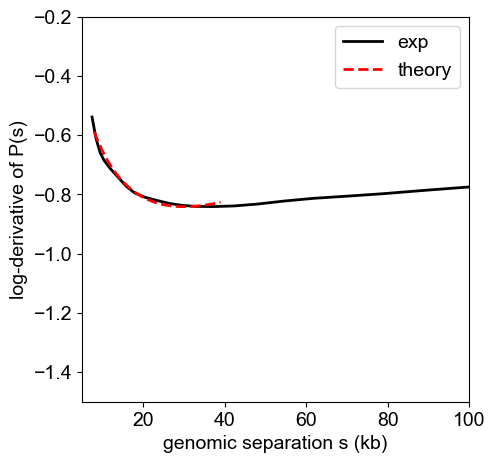

HiC_CN_3.mm10.mapq_30.1000.mcool
T = 180.0
v0 = 7.6
density = 5.56 loops/Mb



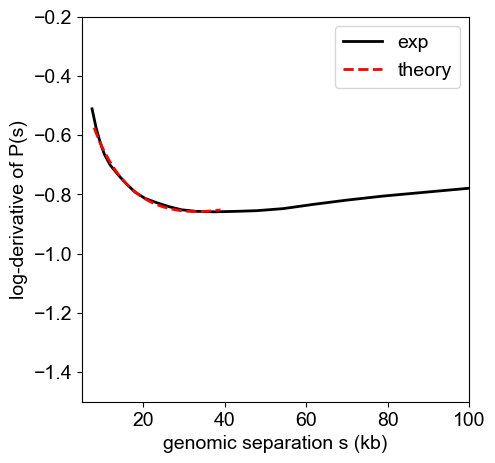

HiC_CN_4.mm10.mapq_30.1000.mcool
T = 200.0
v0 = 9.0
density = 5.00 loops/Mb



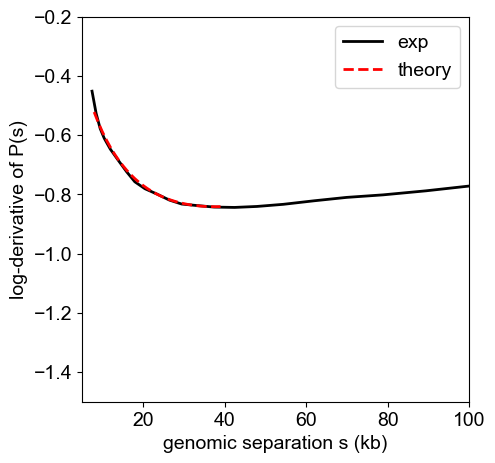

HiC_CN_5.mm10.mapq_30.1000.mcool
T = 200.0
v0 = 7.3
density = 5.00 loops/Mb



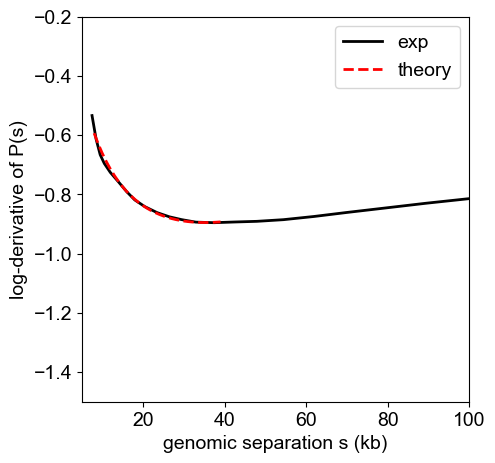

HiC_CN_6.mm10.mapq_30.1000.mcool
T = 210.0
v0 = 8.6
density = 4.76 loops/Mb



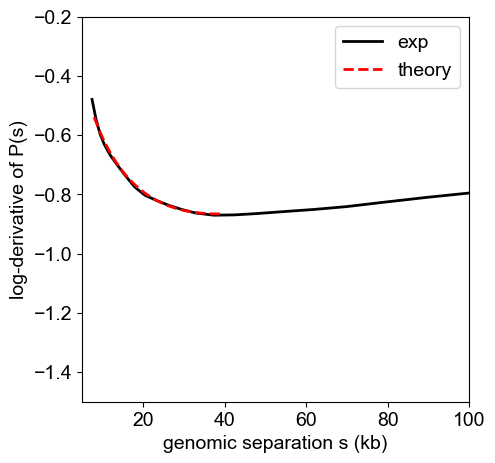

HiC_ES_1.mm10.mapq_30.1000.mcool
T = 200.0
v0 = 5.7
density = 5.00 loops/Mb



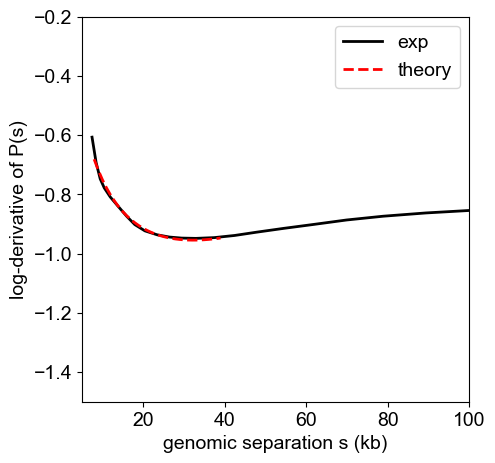

HiC_ES_2.mm10.mapq_30.1000.mcool
T = 190.0
v0 = 5.5
density = 5.26 loops/Mb



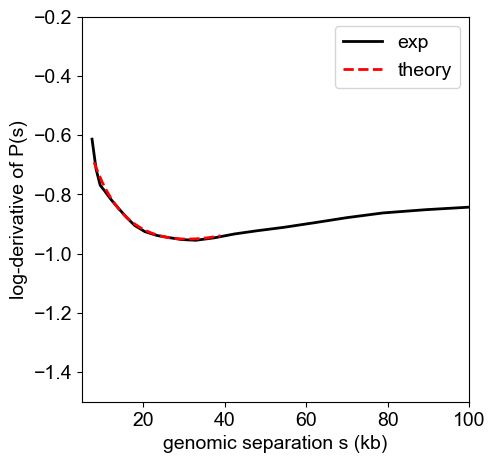

HiC_ES_3.mm10.mapq_30.1000.mcool
T = 210.0
v0 = 5.8
density = 4.76 loops/Mb



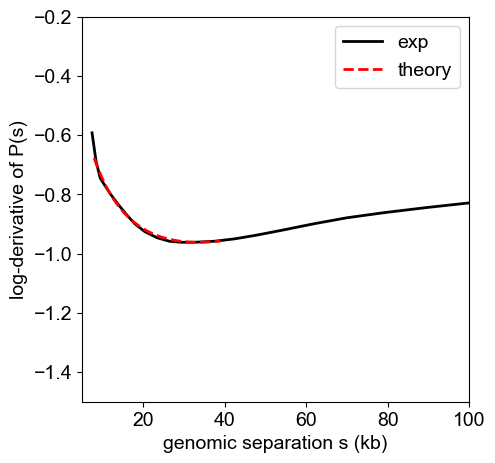

HiC_ES_4.mm10.mapq_30.1000.mcool
T = 190.0
v0 = 6.1
density = 5.26 loops/Mb



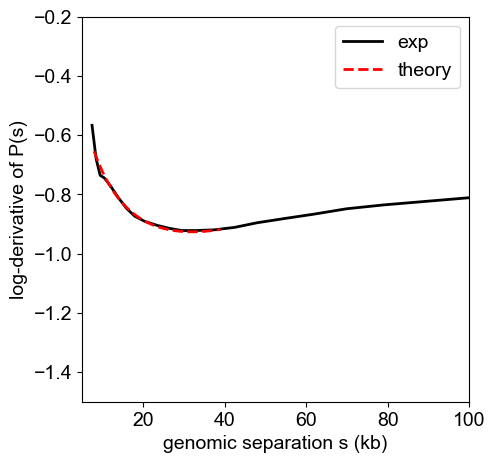

HiC_ncx_CN_1.mm10.mapq_30.1000.mcool
T = 180.0
v0 = 7.5
density = 5.56 loops/Mb



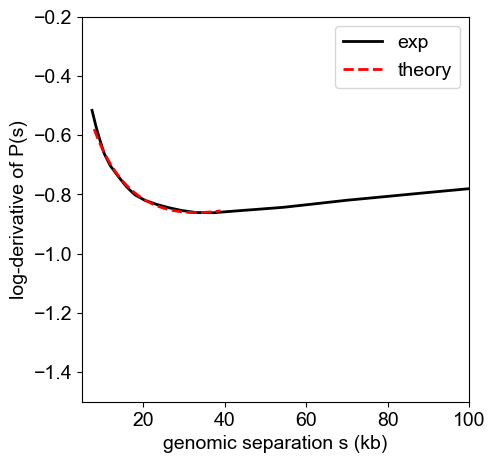

HiC_ncx_CN_2.mm10.mapq_30.1000.mcool
T = 180.0
v0 = 8.0
density = 5.56 loops/Mb



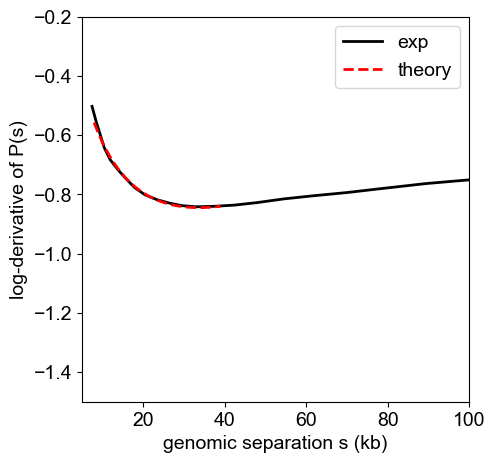

HiC_ncx_CN_3.mm10.mapq_30.1000.mcool
T = 180.0
v0 = 8.1
density = 5.56 loops/Mb



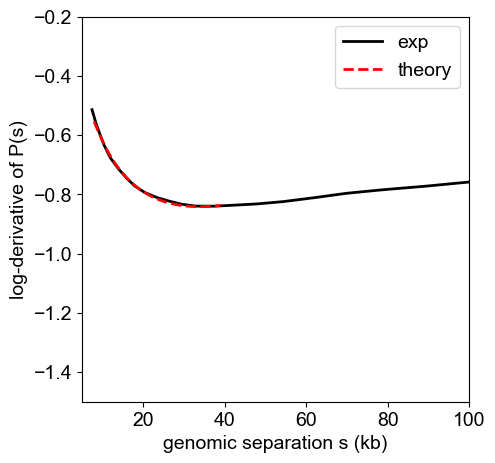

HiC_ncx_CN_4.mm10.mapq_30.1000.mcool
T = 160.0
v0 = 7.9
density = 6.25 loops/Mb



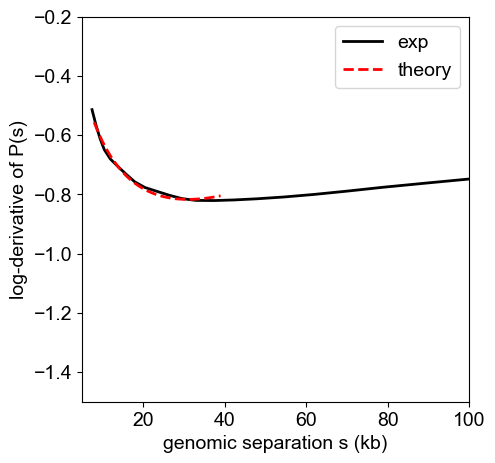

oksuz_hff
U54-HFFc6-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool
T = 150.0
v0 = 2.0
density = 6.67 loops/Mb



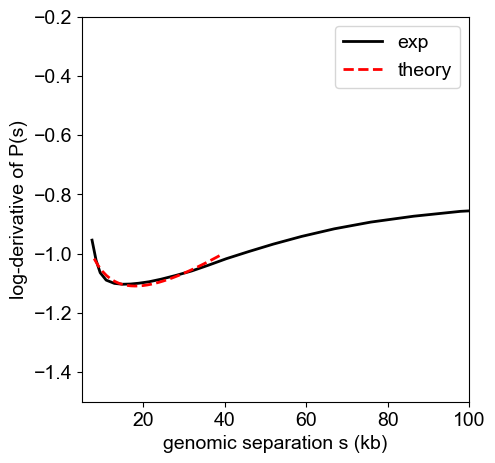

hg38_deep
T = 160.0
v0 = 6.6
density = 6.25 loops/Mb



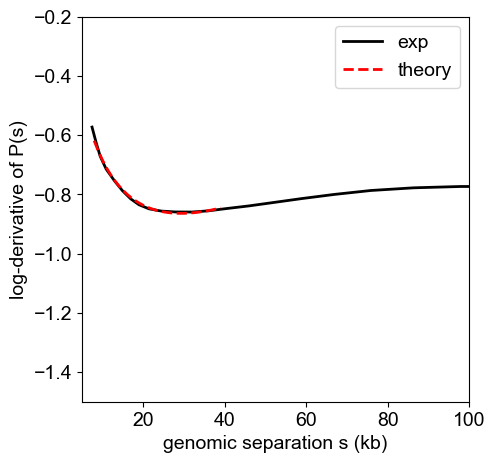

oksuz_esc
U54-ESC4DN-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool
T = 110.0
v0 = 3.0000000000000004
density = 9.09 loops/Mb



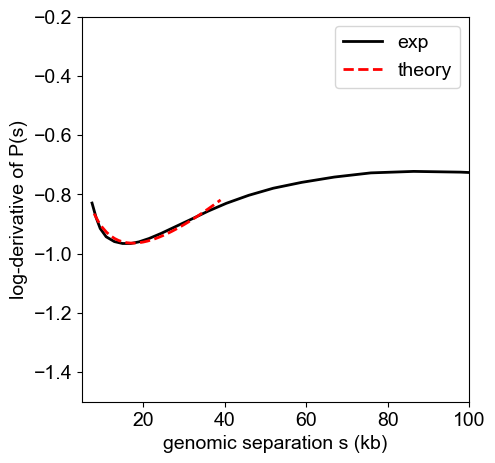

U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool
T = 130.0
v0 = 9.0
density = 7.69 loops/Mb



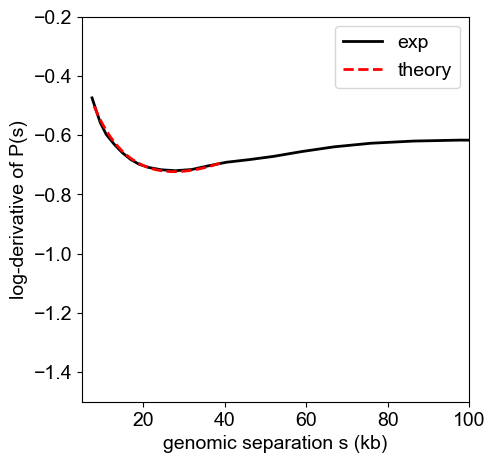

wutz
control.hg38.mapq_30.1000.mcool
T = 130.0
v0 = 1.9000000000000001
density = 7.69 loops/Mb



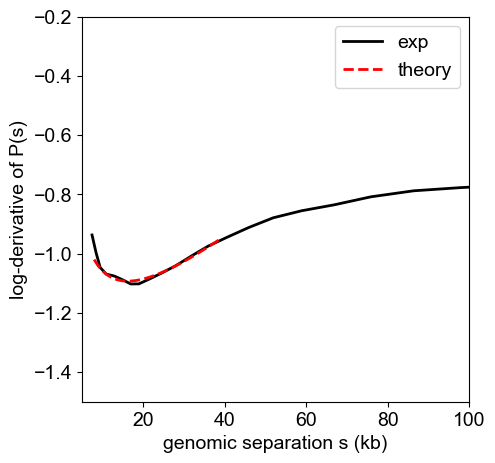

schwarzer
TAM.mm10.mapq_30.1000.mcool
T = 160.0
v0 = 6.8
density = 6.25 loops/Mb



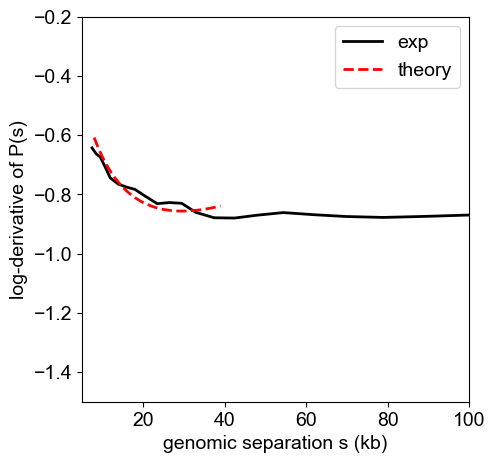

zhang
mid_G1
T = 160.0
v0 = 2.3000000000000003
density = 6.25 loops/Mb



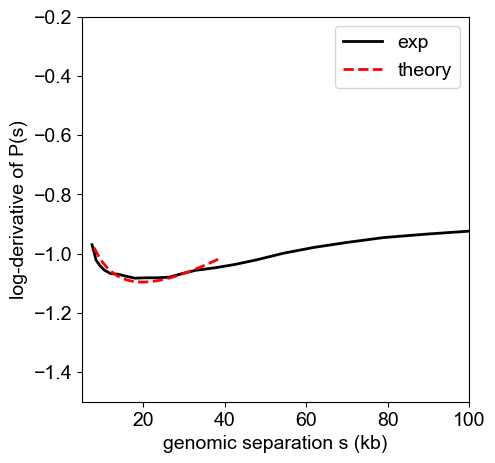

late_G1
T = 150.0
v0 = 2.7
density = 6.67 loops/Mb



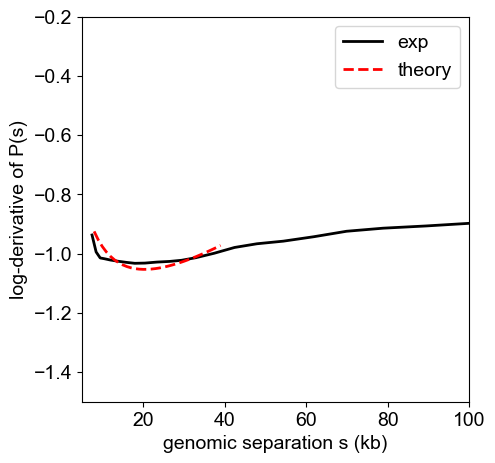

abramo
4h
T = 150.0
v0 = 6.6
density = 6.67 loops/Mb



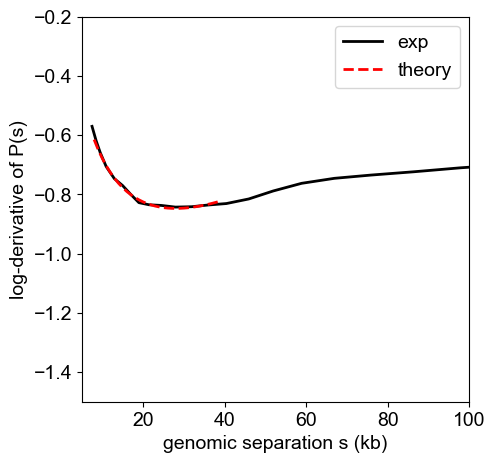

5h
T = 140.0
v0 = 7.1
density = 7.14 loops/Mb



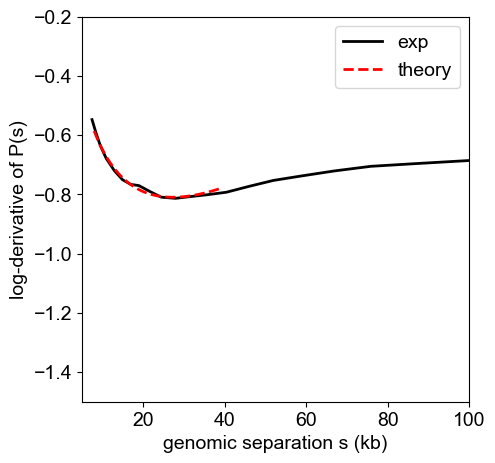

6h
T = 140.0
v0 = 8.7
density = 7.14 loops/Mb



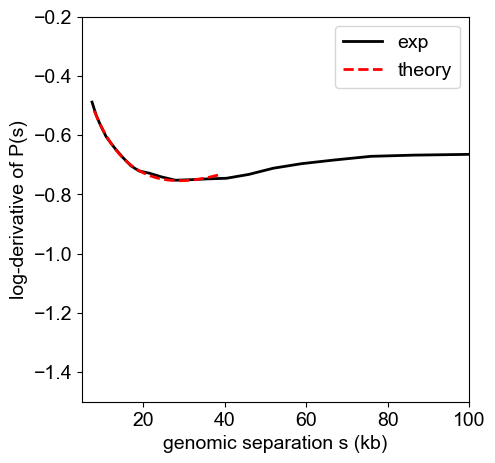

7h
T = 140.0
v0 = 9.3
density = 7.14 loops/Mb



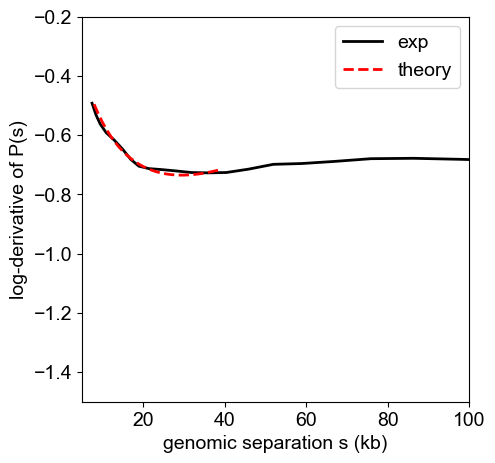

In [10]:
# Optimal parameters from the whole CURVE around the dip -- for each data

data_dir = "logders_fig2_33data"

dataset_styles = {
    "rao":      dict(states=states_rao),
    "bonev":    dict(states=states_bonev),
    "oksuz_hff":dict(states=states_hff),
    "oksuz_esc":dict(states=states_esc),
    "wutz":     dict(states=states_wutz),
    "schwarzer":dict(states=states_schwarzer),
    "zhang":    dict(states=states_zhang),
    "abramo":   dict(states=states_abramo),
}

all_T = []
all_v0 = []
all_density = []

for name, style in dataset_styles.items():

    print(f"{name}")

    for state in style["states"]:
        
        mids, slope = load_data(name, state, data_dir)
        T_opt, v0_opt, s_fit, y_th_fit_opt = get_best_params(mids, slope, s_grid, y_array, \
                                T_values, v0_values, sfit_min=8, sfit_max=40, return_curves=True)        

        print(f"{state}")
        print(f"T = {T_opt}")
        print(f"v0 = {v0_opt}")
        print(f"density = {(1000.0 / T_opt):.2f} loops/Mb")
        print()
        all_T.append(T_opt)
        all_v0.append(v0_opt)
        
        fig = plt.figure(figsize=(5, 5))
        
        plt.plot(mids[1:], slope, color="k", linewidth=2, label="exp")
        plt.plot(s_fit, y_th_fit_opt, color="r", linewidth=2, linestyle='--', label="theory")


        plt.ylim([-1.5, -0.2])
        plt.xlim([5, 100])

        plt.xlabel("genomic separation s (kb)")
        plt.ylabel("log-derivative of P(s)")

        plt.legend()
        plt.tick_params(labelsize=14)

        plt.show()